In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [11]:
data = pd.merge(transactions, customers, on="CustomerID")
data = pd.merge(data, products, on="ProductID")

In [13]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [15]:
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [17]:
data['Month'] = data['TransactionDate'].dt.to_period('M')
data['Year'] = data['TransactionDate'].dt.year

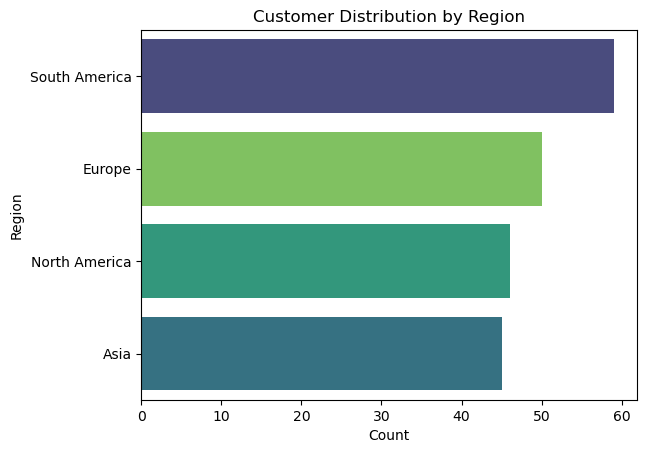

In [29]:


sns.countplot(
    y='Region', 
    data=customers, 
    order=customers['Region'].value_counts().index, 
    hue='Region',  
    palette='viridis', 
    legend=False  
)

plt.title("Customer Distribution by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()


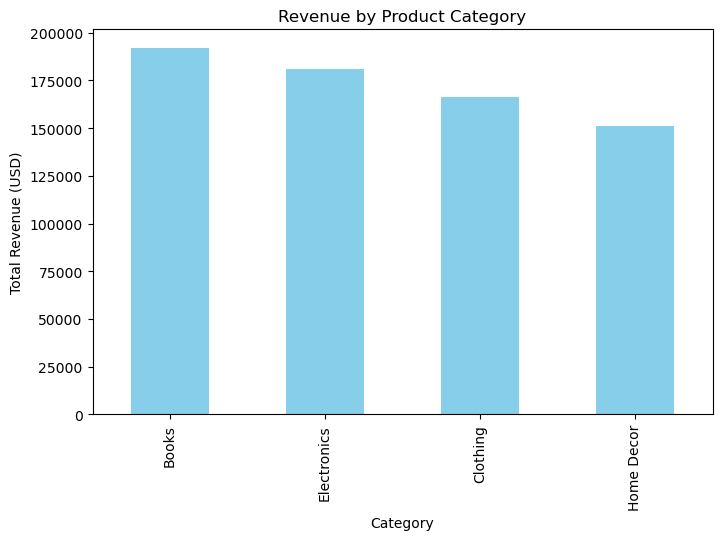

In [21]:
category_revenue = data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='skyblue', title="Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.show()

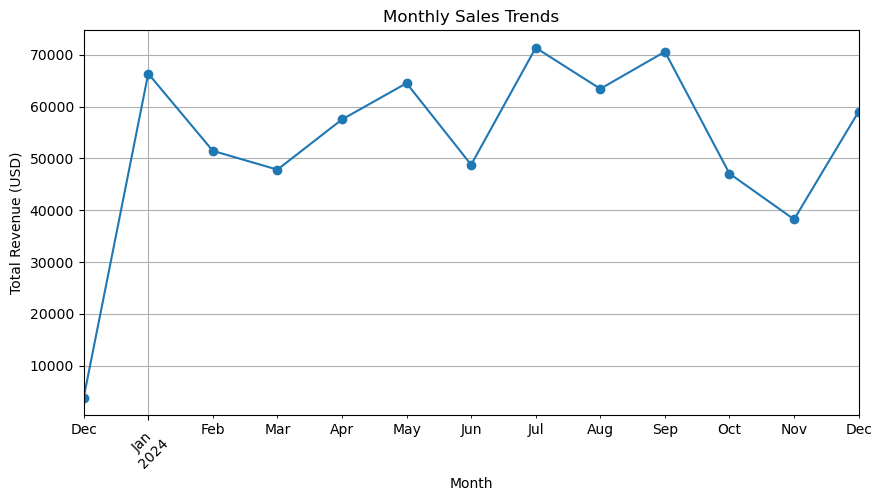

In [23]:
monthly_sales = data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', title="Monthly Sales Trends")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid()
plt.show()

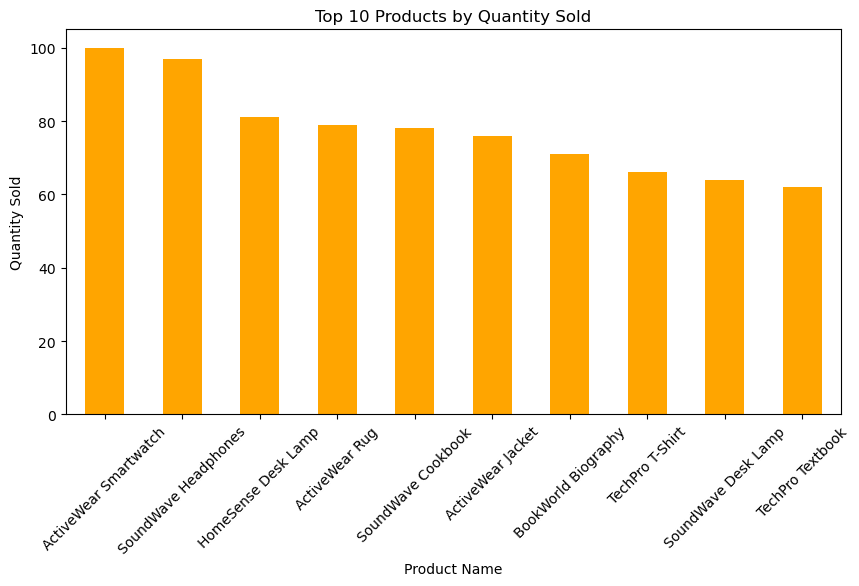

In [25]:
top_products = data.groupby("ProductName")['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='orange', title="Top 10 Products by Quantity Sold")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


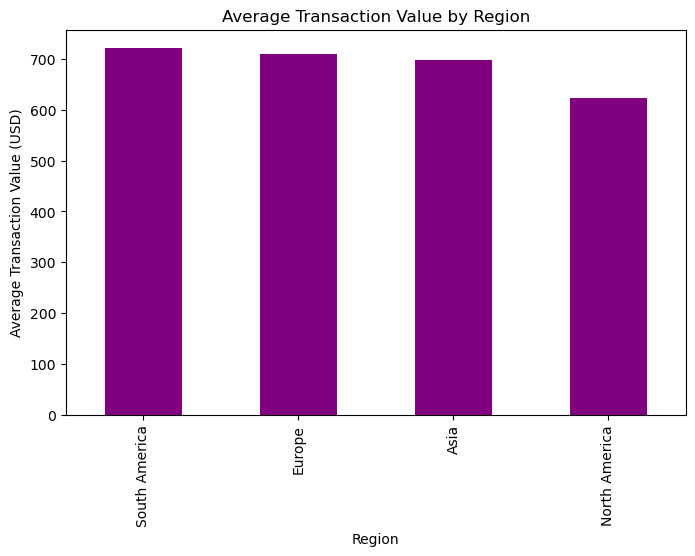

In [27]:
region_avg_value = data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_avg_value.plot(kind='bar', color='purple', title="Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.show()